# WeRateDog Wrangling_and_Analysis 

## Introduction

This notebook seems to analyze a data set from #WerateDog from their tweitter account. It seems to talk\ about how dogs are been rated by using a numerator value of greater than 10 and a denominator value of 10. The stages of the dog was also indicated,, as well as the breed of the dog, the dog name, time of tweet, the source from where it was tweeted, the url links, tweet id, and many other useful information you can access from the data. This information gives us an overview on how dogs are been rated in the weratedog tweitter account. 


### Importing Libraries

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os 
%matplotlib inline

## Data Gathering

#### Gathering the twitter_archive.csv

In [61]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Gathering the Image_prediction.tsv file

In [32]:
folder_name = 'tweet_image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [33]:
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response= requests.get(url)
response

<Response [200]>

In [34]:
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [60]:
image_prediction=pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Gathering Tweet_json form twitter Api

In [17]:
pip install tweepy

  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: oauthlib
    Found existing installation: oauthlib 3.1.1
    Uninstalling oauthlib-3.1.1:
      Successfully uninstalled oauthlib-3.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [36]:
df_3= pd.read_json('tweet-json.txt', lines=True)
df_3.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [62]:
tweet_count = df_3[['id','retweet_count','favorite_count']]
tweet_count

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Accessing my data


### Accessing Twitter_archive dataset

In [101]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [102]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800751577...,12,10,Mauve,None,None,None,None


In [40]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [100]:
twitter_archive.duplicated().sum()

0

In [81]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Sweet         1
old           1
Einstein      1
Luther        1
Crimson       1
Name: name, Length: 957, dtype: int64

In [104]:
twitter_archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [97]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [98]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [42]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Accessing Image_prediction dataset 

In [105]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [106]:
image_prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1382,765395769549590528,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True


In [88]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [111]:
image_prediction.duplicated().sum()

0

In [107]:
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
                                                                                          ..
https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg                                            1
https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg                                            1
https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg                                            1
https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg                                            1
https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg                       

### Accessing Tweet_count dataset

In [112]:
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [113]:
tweet_count.sample()

,tweet_id,retweet_count,favorite_count
2161,669375718304980992,792,1425


In [89]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [63]:
tweet_count.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [114]:
tweet_count.duplicated().sum()

0

### Quality issues

1.Twitter_archive table- timestamp is "string" instead of "datetime" format

2.Twitter_archive table- tweet_id is "int" instead of "string" 

3.Twitter_archive table- some values in rating_numerator is less than 10

4.Twitter_archive table- some values in rating_denominator is not 10

5.Twitter_archive table- some values in rating_numerator equals zero

6.Twitter_archive table- wrong/incorrect dog names "a", "an".

7.Twitter_archive table- "Nulls" in the name column represented as "None"

8.image_prediction table- tweet_id should be "string" not "int"

9.immage_prediction table- names in the "p" columns have both upper and lower case

10.Tweet_count table- column name is "id" instead of "tweet_id"

11.Tweet_count table- tweet_id should be in string not int

### Tidiness issues
1.Twitter_archive table- the doggo,floofer,	pupper,	puppo should be combine to a single column

2.image_prediction table- the "config" in the column name should be "confident"

3.Merge all data set into a single dataset

In [192]:
#checking for dulipcated columns in all dataset
all_columns = pd.Series(list(twitter_archive) + list(image_prediction) + list(tweet_count))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Cleaning data

In [116]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean= image_prediction.copy()
tweet_count_clean = tweet_count.copy()

### Issue #1: 

Quality: tweet_count table- column name is "id" instead of "tweet_id"

#### Define

replace the name column from "id" to "tweet_id"

#### Code

In [117]:
tweet_count_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [125]:
tweet_count_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #2,3, 4: 

Qaulity: 

Tweet_count table- tweet_id should be in string not int

Twitter_archive table- tweet_id is "int" instead of "string"

image_prediction table- tweet_id should be "string" not "int"

#### Define

converting column type with astype method 

#### Code

In [148]:
twitter_archive_clean['tweet_id']= twitter_archive_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id']= image_prediction_clean['tweet_id'].astype(str)
tweet_count_clean['tweet_id']= tweet_count_clean['tweet_id'].astype(str)

#### Test

In [149]:
print(image_prediction_clean['tweet_id'].dtypes)
print(twitter_archive_clean['tweet_id'].dtypes)
print(type(tweet_count_clean['tweet_id'][0]))

object
object
<class 'str'>


In [121]:
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #5: 

Twitter_archive table- some values in rating_denominator is not 10

#### Define

replace all values lesser than 10 with 10.

#### Code

In [122]:
twitter_archive_clean['rating_denominator']= twitter_archive_clean['rating_denominator'].replace( range(0,1000), 10)

#### Test

In [124]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #6: 

Twitter_archive table- timestamp is "string" instead of "datetime" format

#### Define

convert the column type using to_datetime method

#### Code

In [127]:
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [134]:
twitter_archive_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #7: 

Twitter_archive table- "Nulls" in the name column represented as "None"

#### Define

replace this values with nulls using replace method and numpy nan method

#### Code

In [135]:
twitter_archive_clean['name']= twitter_archive_clean['name'].replace('None', value=np.nan)

#### Test

In [137]:
twitter_archive_clean['name'].value_counts()

a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
            ..
Eugene       1
Sweet        1
old          1
Einstein     1
Crimson      1
Name: name, Length: 956, dtype: int64

In [140]:
twitter_archive_clean['name'].sort_values()

1021     Abby
1035     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
2342      NaN
2343      NaN
2344      NaN
2351      NaN
2355      NaN
Name: name, Length: 2356, dtype: object

### Issue #8, 9: 
Quality:

Twitter_archive table- some values in rating_numerator is less than 10

Twitter_archive table- some values in rating_numerator equals zero

#### Define

Adding 10 to all values less than 10 and the values with zero

#### Code

In [142]:
twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ] = twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ].add(10)

<ipython-input-142-6e8363227d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ] = twitter_archive_clean.rating_numerator[twitter_archive_clean['rating_numerator'] <= 10 ].add(10)


#### Test

In [143]:
twitter_archive_clean['rating_numerator'].value_counts()

12      567
11      473
20      462
13      370
19      158
18      102
14       71
17       56
15       39
16       32
420       2
10        2
75        2
27        1
45        1
1776      1
99        1
121       1
143       1
204       1
960       1
666       1
182       1
144       1
88        1
84        1
80        1
60        1
50        1
44        1
26        1
24        1
165       1
Name: rating_numerator, dtype: int64

In [145]:
(twitter_archive_clean['rating_numerator']== 0).sum()

0

### Issue #10: 
Quality:

image_prediction table- names in the "p" columns have both upper and lower case

#### Define

changing the names to upper case using captialize function

#### Code

In [151]:
image_prediction_clean['p1'] = image_prediction_clean['p1'].str.capitalize()
image_prediction_clean['p2'] = image_prediction_clean['p2'].str.capitalize()
image_prediction_clean['p3'] = image_prediction_clean['p3'].str.capitalize()

#### Test

In [153]:
image_prediction_clean['p1'].sample()

624    French_bulldog
Name: p1, dtype: object

### Issue #11: 
Tideness

Twitter_archive table- the doggo,floofer, pupper, puppo should be combine to a single column

#### Define

extract dog stage from text and put it in new column 'dog stage' then drop the real columns

#### Code

In [154]:
twitter_archive_clean['Dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [166]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'Dog_stage'],
      dtype='object')

In [157]:
twitter_archive_clean['Dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Dog_stage, dtype: int64

### Issue #12: 

Tideness

image_prediction table- the "conf" in the column name should be "confident"

#### Define

change the column name from config to configuration using rename method in pandas 

#### Code

In [167]:
image_prediction_clean.rename(columns={'p1_conf': 'p1_confident'}, inplace=True)
image_prediction_clean.rename(columns={'p2_conf': 'p2_confident'}, inplace=True)
image_prediction_clean.rename(columns={'p3_conf': 'p1_confident'}, inplace=True)

#### Test

In [168]:
list(image_prediction_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_confident',
 'p1_dog',
 'p2',
 'p2_confident',
 'p2_dog',
 'p3',
 'p1_confident',
 'p3_dog']

### Issue #12: 

#### Define

Merging the three dataset into a single dataframe

#### Code

In [170]:
twitter_clean_data = pd.merge(twitter_archive_clean , image_prediction_clean , on= "tweet_id" , how="left") 
twitter_clean_data = pd.merge(twitter_clean_data, tweet_count_clean , on= "tweet_id" , how="left")

#### Test

In [171]:
twitter_clean_data.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p1_confident,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [177]:
twitter_clean_data.shape

(2356, 27)

### Issue #13:  
Quality: 

The incorrect or strange dog name "a"

#### Define

This can be true as it may depend on several reasons:

1.it can be a valid dog name of person ( as naming your dog does not have a specific rule or guidlines to follow)

2.it may be a name that of great importance to someone i.e remembering a event, the first word pronunce by a child, and so many.

#### Code

#### Test

## storing the cleaned data

In [179]:
twitter_clean_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [181]:
 tweet_data= pd.read_csv('twitter_archive_master.csv')

In [189]:
tweet_data

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p1_confident.1,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41.0,111.0
2352,2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,...,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,147.0,311.0
2353,2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,47.0,128.0
2354,2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,...,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48.0,132.0


In [182]:
dog_names = tweet_data.query('name == name')
group_dog_names = dog_names.groupby('name').count()[['tweet_id']]
group_dog_names.rename(columns={'tweet_id':'name_count'}, inplace=True)


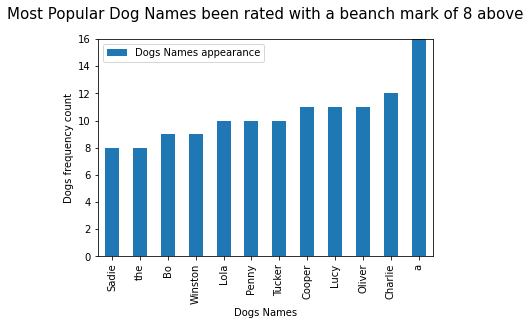

In [191]:
group_dog_names.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=16)
plt.title("Most Popular Dog Names been rated with a beanch mark of 8 above",{'fontsize': 15},pad=20)
plt.xlabel("Dogs Names")
plt.ylabel("Dogs frequency count")
plt.legend(["Dogs Names appearance"])

#### Insight 

1.The strange dog name "a" seems to have the highest rating. this can be as a result that this particular dog with this strange name has one of the best and beautiful image making it to have the highest rating 

<BarContainer object of 4 artists>

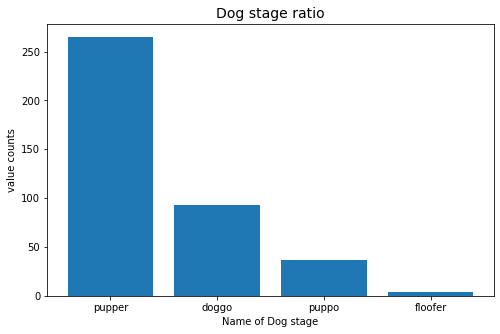

In [188]:
plt.figure(figsize=(8,5))
plt.title("Dog stage ratio", fontsize=14)
plt.xlabel('Name of Dog stage')
plt.ylabel("value counts")
plt.bar(x=tweet_data['Dog_stage'].value_counts().index,
        height=tweet_data.Dog_stage.value_counts().values)

In [190]:
tweet_data.Dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Dog_stage, dtype: int64

#### Insight

1.it is clear shown from the chart that the "pupper" dog stage has the highest ratio

2.Also that the "floofer" dog stage has the least rating  with a value count of four(4). 

This simply means vast majority of the dogs been rated where in pupper stage.